# Módulo 9: TdD III - Agregações e operações em grupos

# Exercício 2

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [185]:
# importando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [186]:
# carregando arquivo e construindo DataFrame

arquivo = pd.read_csv('SINASCI_RO_2019.csv')
df_sinasci = pd.DataFrame(arquivo)


# informações sobre os dados

df_sinasci.columns


Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [187]:
# variáveis numéricas

variaveis_numericas = df_sinasci.select_dtypes(include=['float'])
variaveis_numericas.columns

Index(['CODESTAB', 'ESTCIVMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'HORANASC', 'APGAR1', 'APGAR5', 'IDANOMAL', 'DTRECORIGA', 'NATURALMAE',
       'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE',
       'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI',
       'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT',
       'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP',
       'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')

In [188]:
# criando nova coluna "faixa_latitude" - menos infinito | -10.5 | mais infinito

df_sinasci['faixa_latitude'] = pd.cut(df_sinasci['munResLat'], 
                                      bins=[-float('inf'), -10.5, float('inf')], 
                                      labels=['Abaixo de -10.5', 'Acima de -10.5'])

print('\n')
print(df_sinasci[['munResLat', 'faixa_latitude']].head())
print('\n')




   munResLat   faixa_latitude
0  -11.93554  Abaixo de -10.5
1  -11.93554  Abaixo de -10.5
2  -11.93554  Abaixo de -10.5
3  -12.13178  Abaixo de -10.5
4  -11.93554  Abaixo de -10.5




In [189]:
# groupBy com as variáveis CONSULTAS E QTDPARTNOR

resultados = (
    df_sinasci.groupby('faixa_latitude', observed=False)[['QTDPARTCES', 'QTDPARTNOR']]
    .agg([('Soma','sum'), ('Média','mean'), ('Minímo','min'), ('Máximo','max'), 
          ('Mediana','median'), ('Desvio Padrão','std'), ('Variância','var')])
    .reset_index()
)

resultados

faixa_latitude QTDPARTCES                                                \
                         Soma     Média Minímo Máximo Mediana Desvio Padrão   
0  Abaixo de -10.5     7095.0  0.552570    0.0   12.0     0.0      0.753036   
1   Acima de -10.5     6041.0  0.487335    0.0   12.0     0.0      0.737899   

            QTDPARTNOR                                                          
  Variância       Soma     Média Minímo Máximo Mediana Desvio Padrão Variância  
0  0.567062     5800.0  0.452242    0.0   41.0     0.0      1.123426  1.262087  
1  0.544495     8771.0  0.711759    0.0   40.0     0.0      1.279042  1.635949

- **Insight:** 
- Cidades situadas **abaixo de -10.5** de latitude têm mais partos do tipo Cesárea do que as cidades situadas **acima de -10.5**. 
- Já as cidades  situadas **acima de -10.5** de latitude têm mais partos do tipo Normal do que as cidades situadas **abaixo de -10.5**.


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [190]:
# criando nova coluna "faixa_area" - menos infinito | 3000 | mais infinito

df_sinasci['faixa_area'] = pd.cut(df_sinasci['munResArea'], 
                                      bins=[-float('inf'), 3000, float('inf')], 
                                      labels=['Abaixo de 3000', 'Acima de 3000'])

print('\n')
print(df_sinasci[['munResArea', 'faixa_area']].head())
print('\n')



   munResArea     faixa_area
0    7067.025  Acima de 3000
1    7067.025  Acima de 3000
2    7067.025  Acima de 3000
3    3958.273  Acima de 3000
4    7067.025  Acima de 3000




In [191]:
# groupBy com as variáveis CONSULTAS E QTDPARTNOR

resultados = (
    df_sinasci.groupby('faixa_area', observed=False)[['QTDGESTANT', 'QTDFILMORT']]
    .agg([('Soma','sum'), ('Média','mean'), ('Minímo','min'), ('Máximo','max'), 
          ('Mediana','median'), ('Desvio Padrão','std'), ('Variância','var')])
    .reset_index()
)

resultados

faixa_area QTDGESTANT                                                \
                        Soma     Média Minímo Máximo Mediana Desvio Padrão   
0  Abaixo de 3000     5870.0  1.134300    0.0    9.0     1.0      1.208914   
1   Acima de 3000    27046.0  1.310368    0.0   52.0     1.0      1.447429   

            QTDFILMORT                                                          
  Variância       Soma     Média Minímo Máximo Mediana Desvio Padrão Variância  
0  1.461473     1260.0  0.244803    0.0    4.0     0.0      0.551215  0.303838  
1  2.095052     5383.0  0.272116    0.0   28.0     0.0      0.629081  0.395743

- **Insight:** 

- Cidades com áreas **acima de 3000** têm uma média maior de quantidade de gestações em relação às cidades com área **abaixo de 3000**. Dado que sugere que elas são mais populosas visto que têm **27046** gestações comparadas com **5870** gestações das áreas **abaixo de 3000**. 

- Os dados também evidenciam que as cidades com áreas **acima de 3000** têm uma média da quantidade de filhos mortos maior que as cidades com áreas **abaixo de 3000**. 


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [192]:
# criando nova coluna "faixa_altitude" - qcut quebra em 2


df_sinasci['faixa_altitude'] = pd.qcut(df_sinasci['munResAlt'], 2)

print('\n')
print(df_sinasci[['munResAlt', 'faixa_altitude']].head())
print('\n')




   munResAlt  faixa_altitude
0      338.0  (153.0, 595.0]
1      338.0  (153.0, 595.0]
2      338.0  (153.0, 595.0]
3      397.0  (153.0, 595.0]
4      338.0  (153.0, 595.0]




In [193]:
# groupBy com as variáveis CONSULTAS E QTDPARTNOR

resultados = (
    df_sinasci.groupby('faixa_altitude', observed=False)[['SEMAGESTAC', 'STTRABPART']]
    .agg([('Soma','sum'), ('Média','mean'), ('Minímo','min'), ('Máximo','max'), 
          ('Mediana','median'), ('Desvio Padrão','std'), ('Variância','var')])
    .reset_index()
)

resultados

faixa_altitude SEMAGESTAC                                                 \
                         Soma      Média Minímo Máximo Mediana Desvio Padrão   
0  (84.999, 153.0]   493526.0  38.568771   21.0   45.0    39.0      2.093561   
1   (153.0, 595.0]   501090.0  38.566151   19.0   45.0    39.0      1.938267   

            STTRABPART                                                          
  Variância       Soma     Média Minímo Máximo Mediana Desvio Padrão Variância  
0  4.383000    25299.0  1.975096    1.0    9.0     2.0      0.669624  0.448396  
1  3.756881    26475.0  1.994951    1.0    9.0     2.0      0.613504  0.376387

- **Insight:** 

- Cidades com altitudes **entre 84.999 e 153** e cidades com altitudes **entre 153 e 595** têm uma média semelhante na quantidade de semanas de gestação SEMAGESTAC que fica em torno de 38 semanas e meia.  

- Cidades com altitudes **entre 84.999 e 153** e cidades com altitudes **entre 153 e 595** têm uma média semelhante no Status de Trabalho de Parto STTRABPART que fica em torno de 2, ou seja, parto que não estava em curso.  


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [194]:
# Regiões Imediatas do estado de Rondônia

imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Ji-Paraná",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}



In [195]:
# separando dataFrame para consulta

df_consulta = df_sinasci[['munResNome','IDADEMAE']]


In [196]:
# atribuindo index para a coluna 'munResNome'

df_consulta = df_consulta.set_index('munResNome')


In [197]:
# groupBy para regiões imediatas

df_consulta.groupby(imediatas).mean()

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.284004
Jaru,25.708853
Ji-Paraná,26.174393
Porto Velho,26.166303
Vilhena,26.417143


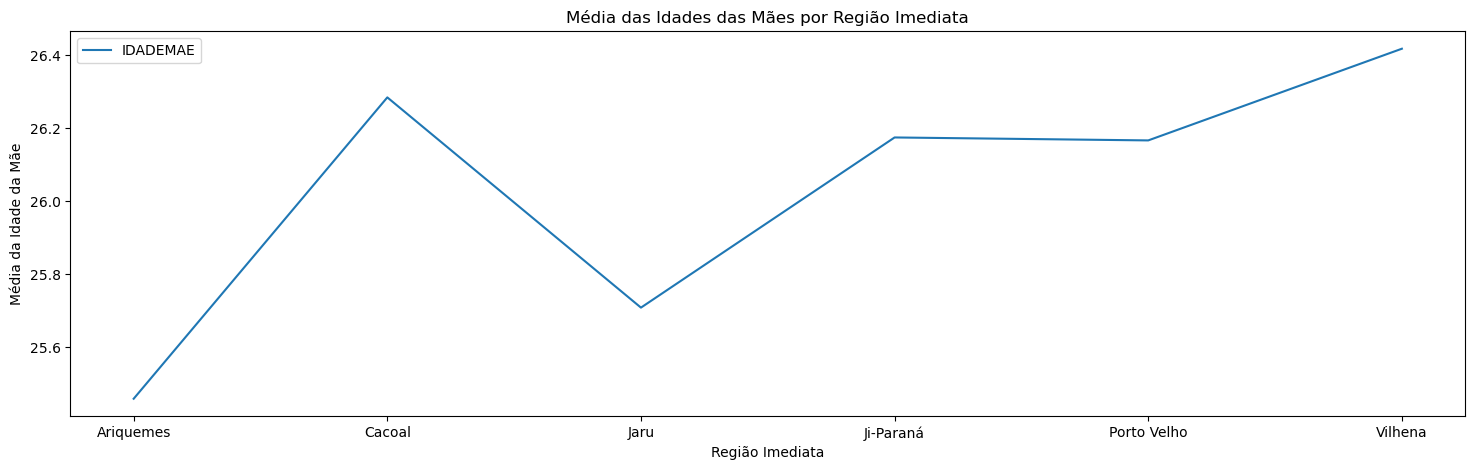

In [198]:
# plotando os dados das "idades" das mães por regiões imediatas

df_consulta.groupby(imediatas).mean().plot(figsize=[18,5]);
plt.title('Média das Idades das Mães por Região Imediata')
plt.xlabel('Região Imediata')
plt.ylabel('Média da Idade da Mãe')
plt.show()

- **Insight:** 

- As cidades das regiões de **Arquimedes** e **Jaru** têm a média das idades das mães menor do que as demais regiões.  




### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [199]:
# Índice de Desenvolvimento Humano - IDH

IDH = {
    "Candeias do Jamari": "Médio",
    "Guajará-Mirim": "Baixo",
    "Itapuã do Oeste": "Baixo",
    "Nova Mamoré": "Baixo",
    "Porto Velho": "Alto",
    "Alto Paraíso": "Baixo",
    "Ariquemes": "Alto",
    "Buritis": "Baixo",
    "Cacaulândia": "Baixo",
    "Campo Novo de Rondônia": "Baixo",
    "Cujubim": "Baixo",
    "Monte Negro": "Baixo",
    "Rio Crespo": "Baixo",
    "Jaru": "Baixo",
    "Governador Jorge Teixeira": "Baixo",
    "Machadinho D'Oeste": "Baixo",
    "Theobroma": "Baixo",
    "Vale do Anari": "Baixo",
    "Alvorada D'Oeste": "Baixo",
    "Costa Marques": "Baixo",
    "Ji-Paraná": "Alto",
    "Mirante da Serra": "Baixo",
    "Nova União": "Baixo",
    "Ouro Preto do Oeste": "Baixo",
    "Presidente Médici": "Baixo",
    "São Francisco do Guaporé": "Baixo",
    "São Miguel do Guaporé": "Baixo",
    "Seringueiras": "Baixo",
    "Teixeirópolis": "Baixo",
    "Urupá": "Baixo",
    "Vale do Paraíso": "Baixo",
    "Cacoal": "Alto",
    "Alta Floresta D'Oeste": "Baixo",
    "Alto Alegre dos Parecis": "Baixo",
    "Castanheiras": "Baixo",
    "Espigão D'Oeste": "Baixo",
    "Ministro Andreazza": "Baixo",
    "Nova Brasilândia D'Oeste": "Baixo",
    "Novo Horizonte do Oeste": "Baixo",
    "Parecis": "Baixo",
    "Pimenta Bueno": "Alto",
    "Primavera de Rondônia": "Baixo",
    "Rolim de Moura": "Alto",
    "Santa Luzia D'Oeste": "Baixo",
    "São Felipe D'Oeste": "Baixo",
    "Vilhena": "Alto",
    "Cabixi": "Baixo",
    "Cerejeiras": "Baixo",
    "Chupinguaia": "Baixo",
    "Colorado do Oeste": "Baixo",
    "Corumbiara": "Baixo",
    "Pimenteiras do Oeste": "Baixo"
}


In [200]:
# separando dataFrame para consulta

df_consulta = df_sinasci[['munResNome','IDADEMAE', 'QTDGESTANT']]


In [201]:
# atribuindo index para a coluna 'munResNome'

df_consulta = df_consulta.set_index('munResNome')


In [202]:
# groupBy para IDH

df_consulta.groupby(IDH).mean()

,IDADEMAE,QTDGESTANT
munResNome,,
Alto,26.280332,1.277690
Baixo,25.803254,1.257358
Médio,25.243323,1.701639


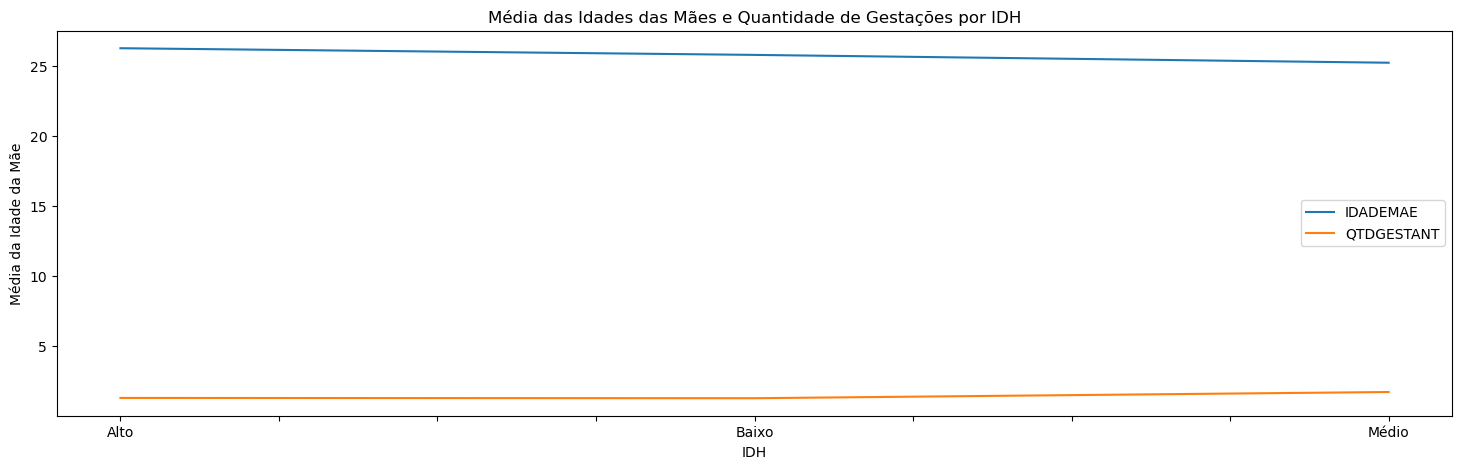

In [203]:
# plotando os dados das "idades" E "quantidade de gestações" das mães por IDH

df_consulta.groupby(IDH).mean().plot(figsize=[18,5]);
plt.title('Média das Idades das Mães e Quantidade de Gestações por IDH')
plt.xlabel('IDH')
plt.ylabel('Média da Idade da Mãe')
plt.show()

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [204]:
# Índice FIRJAN de Desenvolvimento Municipal - IFDM 

IFDM = {
    "Candeias do Jamari": "Moderado",
    "Guajará-Mirim": "Regular",
    "Itapuã do Oeste": "Regular",
    "Nova Mamoré": "Regular",
    "Porto Velho": "Moderado",
    "Alto Paraíso": "Regular",
    "Ariquemes": "Moderado",
    "Buritis": "Moderado",
    "Cacaulândia": "Regular",
    "Campo Novo de Rondônia": "Regular",
    "Cujubim": "Regular",
    "Monte Negro": "Moderado",
    "Rio Crespo": "Moderado",
    "Jaru": "Moderado",
    "Governador Jorge Teixeira": "Regular",
    "Machadinho D'Oeste": "Regular",
    "Theobroma": "Regular",
    "Vale do Anari": "Regular",
    "Alvorada D'Oeste": "Regular",
    "Costa Marques": "Regular",
    "Ji-Paraná": "Moderado",
    "Mirante da Serra": "Regular",
    "Nova União": "Regular",
    "Ouro Preto do Oeste": "Moderado",
    "Presidente Médici": "Moderado",
    "São Francisco do Guaporé": "Moderado",
    "São Miguel do Guaporé": "Moderado",
    "Seringueiras": "Regular",
    "Teixeirópolis": "Moderado",
    "Urupá": "Moderado",
    "Vale do Paraíso": "Regular",
    "Cacoal": "Moderado",
    "Alta Floresta D'Oeste": "Moderado",
    "Alto Alegre dos Parecis": "Regular",
    "Castanheiras": "Regular",
    "Espigão D'Oeste": "Regular",
    "Ministro Andreazza": "Regular",
    "Nova Brasilândia D'Oeste": "Regular",
    "Novo Horizonte do Oeste": "Regular",
    "Parecis": "Regular",
    "Pimenta Bueno": "Moderado",
    "Primavera de Rondônia": "Moderado",
    "Rolim de Moura": "Moderado",
    "Santa Luzia D'Oeste": "Moderado",
    "São Felipe D'Oeste": "Moderado",
    "Vilhena": "Moderado",
    "Cabixi": "Regular",
    "Cerejeiras": "Moderado",
    "Chupinguaia": "Moderado",
    "Colorado do Oeste": "Moderado",
    "Corumbiara": "Regular",
    "Pimenteiras do Oeste": "Moderado"
}


In [205]:
# separando dataFrame para consulta

df_consulta = df_sinasci[['munResNome','IDADEMAE', 'QTDGESTANT']]


In [206]:
# atribuindo index para a coluna 'munResNome'

df_consulta = df_consulta.set_index('munResNome')

In [207]:
# groupBy para IFDM

df_consulta.groupby(IFDM).mean()

,IDADEMAE,QTDGESTANT
munResNome,,
Moderado,26.223139,1.256705
Regular,25.535131,1.351368


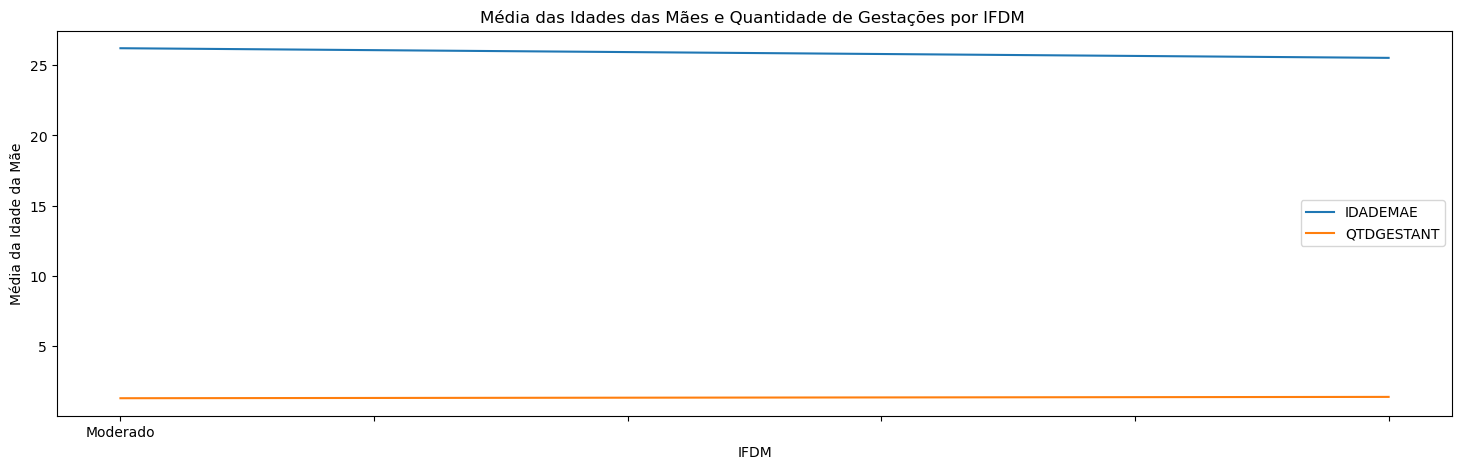

In [208]:
# plotando os dados das "idades" e "quantidade de gestações" das mães por IFDM 

df_consulta.groupby(IFDM).mean().plot(figsize=[18,5]);
plt.title('Média das Idades das Mães e Quantidade de Gestações por IFDM ')
plt.xlabel('IFDM')
plt.ylabel('Média da Idade da Mãe')
plt.show()

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [209]:
#  Produto Interno Bruto - PIB 

PIB = {
    "Candeias do Jamari": "2. Maior que 500 Milhões",
    "Guajará-Mirim": "2. Maior que 500 Milhões",
    "Itapuã do Oeste": "5. Maior que 100 Milhões",
    "Nova Mamoré": "2. Maior que 500 Milhões",
    "Porto Velho": "1. Maior que 1 Bilhão",
    "Alto Paraíso": "3. Maior que 300 Milhões",
    "Ariquemes": "1. Maior que 1 Bilhão",
    "Buritis": "2. Maior que 500 Milhões",
    "Cacaulândia": "5. Maior que 100 Milhões",
    "Campo Novo de Rondônia": "4. Maior que 200 Milhões",
    "Cujubim": "3. Maior que 300 Milhões",
    "Monte Negro": "4. Maior que 200 Milhões",
    "Rio Crespo": "6. Menor que 100 Milhões",
    "Jaru": "1. Maior que 1 Bilhão",
    "Governador Jorge Teixeira": "5. Maior que 100 Milhões",
    "Machadinho D'Oeste": "2. Maior que 500 Milhões",
    "Theobroma": "5. Maior que 100 Milhões",
    "Vale do Anari": "5. Maior que 100 Milhões",
    "Alvorada D'Oeste": "4. Maior que 200 Milhões",
    "Costa Marques": "5. Maior que 100 Milhões",
    "Ji-Paraná": "1. Maior que 1 Bilhão",
    "Mirante da Serra": "5. Maior que 100 Milhões",
    "Nova União": "6. Menor que 100 Milhões",
    "Ouro Preto do Oeste": "2. Maior que 500 Milhões",
    "Presidente Médici": "3. Maior que 300 Milhões",
    "São Francisco do Guaporé": "3. Maior que 300 Milhões",
    "São Miguel do Guaporé": "2. Maior que 500 Milhões",
    "Seringueiras": "5. Maior que 100 Milhões",
    "Teixeirópolis": "6. Menor que 100 Milhões",
    "Urupá": "5. Maior que 100 Milhões",
    "Vale do Paraíso": "5. Maior que 100 Milhões",
    "Cacoal": "1. Maior que 1 Bilhão",
    "Alta Floresta D'Oeste": "3. Maior que 300 Milhões",
    "Alto Alegre dos Parecis": "4. Maior que 200 Milhões",
    "Castanheiras": "6. Menor que 100 Milhões",
    "Espigão D'Oeste": "2. Maior que 500 Milhões",
    "Ministro Andreazza": "5. Maior que 100 Milhões",
    "Nova Brasilândia D'Oeste": "3. Maior que 300 Milhões",
    "Novo Horizonte do Oeste": "5. Maior que 100 Milhões",
    "Parecis": "6. Menor que 100 Milhões",
    "Pimenta Bueno": "1. Maior que 1 Bilhão",
    "Primavera de Rondônia": "6. Menor que 100 Milhões",
    "Rolim de Moura": "1. Maior que 1 Bilhão",
    "Santa Luzia D'Oeste": "5. Maior que 100 Milhões",
    "São Felipe D'Oeste": "6. Menor que 100 Milhões",
    "Vilhena": "1. Maior que 1 Bilhão",
    "Cabixi": "5. Maior que 100 Milhões",
    "Cerejeiras": "2. Maior que 500 Milhões",
    "Chupinguaia": "5. Maior que 100 Milhões",
    "Colorado do Oeste": "3. Maior que 300 Milhões",
    "Corumbiara": "5. Maior que 100 Milhões",
    "Pimenteiras do Oeste": "6. Menor que 100 Milhões"
}


In [210]:
# separando dataFrame para consulta

df_consulta = df_sinasci[['munResNome','IDADEMAE', 'QTDGESTANT']]

In [211]:
# atribuindo index para a coluna 'munResNome'

df_consulta = df_consulta.set_index('munResNome')

In [212]:
# groupBy para PIB

df_consulta.groupby(PIB).mean()

,IDADEMAE,QTDGESTANT
munResNome,,
1. Maior que 1 Bilhão,26.265562,1.268052
2. Maior que 500 Milhões,25.782528,1.399331
3. Maior que 300 Milhões,25.833511,1.192719
4. Maior que 200 Milhões,25.323204,1.147887
5. Maior que 100 Milhões,25.662910,1.225521
6. Menor que 100 Milhões,26.515081,1.126168


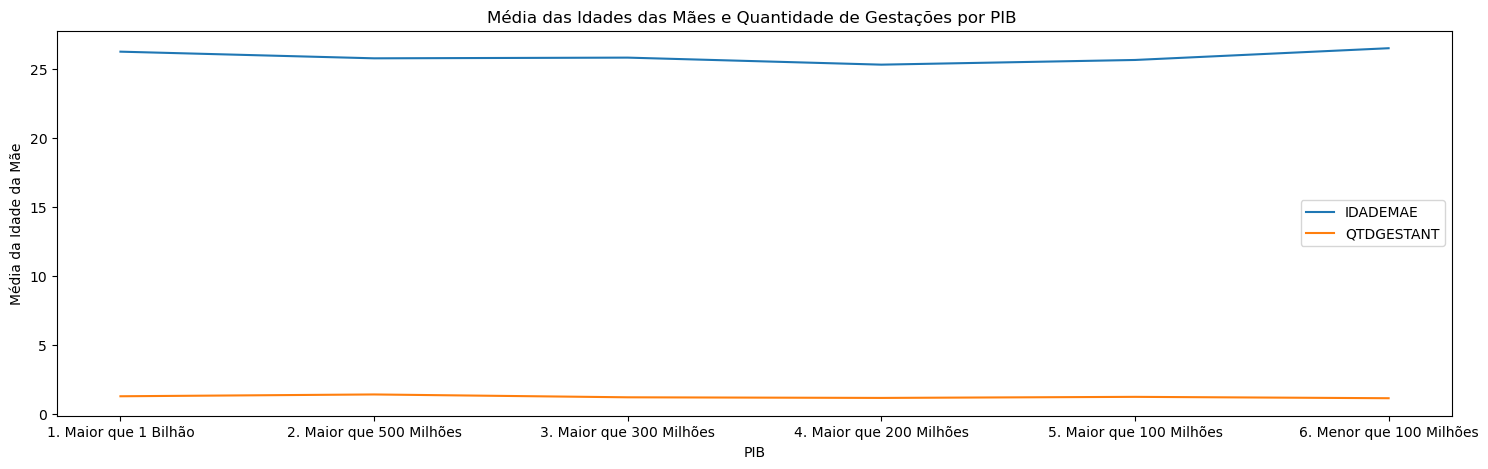

In [213]:
# plotando os dados das "idades" e "quantidade de gestações" das mães por PIB 

df_consulta.groupby(PIB).mean().plot(figsize=[18,5]);
plt.title('Média das Idades das Mães e Quantidade de Gestações por PIB ')
plt.xlabel('PIB')
plt.ylabel('Média da Idade da Mãe')
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Insight:
Verificando os dados de - IDH, IFDM e PIB das cidades de Rondônia e as relacionando com as variáveis IDADEMAE (idade da mãe) e QTDGESTANT (quantidade de gestações) foi notado:
- não há diferenças significativas em relação à idade de mãe que ficou entre **25 e 26 anos** em média;
- não há diferenças significativas em relação ao número de gestações para cada mãe que ficou aproximadamente entre **1.2 e 1.4** gestações por mãe. Há uma excessão no caso de cidades classificadas pelo IDH - **IDH Médio** tem 1.7 gestações por mãe. Cidades com **IDH Alto** e **IDH Baixo** têm taxas menores de gestações por mãe.
- Em cidades que têm PIB **Menor que 200 Milhões** o número de gestações por mãe fica abaixo de **1.2**.
- Em linhas gerais vemos que a taxa de natalidade vista através dos dados do **SINASC** do estado de **Rondônia** são baixas seguindo uma tendência contemporânea. Os casais estão tendo menos filhos por causa do custo parental que uma criança trás para uma família. Para além disso, podemos pensar que a ida da mulher para mercado de trabalho impacta no número de gestações por casal.